In [1]:
from sklearn.metrics import accuracy_score
import math
import matplotlib.pyplot as plt
# import tensorflow as tf
import torch
from utils.helper import Extract
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os

In [31]:
class nnFC(nn.Module):
    def __init__(self):
        super(nnFC, self).__init__()
        
        self.linear1 = torch.nn.Linear(200,20)
        self.linear2 = torch.nn.Linear(20,10)
        
    def forward(self, x):
        
        h1_relu = F.relu(self.linear1(x))
        y_pred = F.relu(self.linear2(h1_relu))
        
        return y_pred

In [32]:
extractor = Extract()
df_list = extractor.extract_data_from_pdb('d1')
enc_df_list = extractor.get_one_hot_encoding(df_list)


In [60]:
model = nnFC()

In [68]:
batch_size = 32
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

allX, allY = extractor.get_training_data(enc_df_list)
xd,yd = allX.shape
# print(allX.shape)
split_indices = [i for i in range(batch_size,xd,batch_size)]
# print(len(split_indices))
batchXlist = np.split(allX,split_indices)[:-1]
batchYlist = np.split(allY,split_indices)[:-1]
# print(len(batchXlist))
num_batches=math.ceil(xd/batch_size)-1
batches = [(batchXlist[i],batchYlist[i]) for i in range(num_batches)]

# print(num_batches)

for epoch in range(500):
    #shuffle dataset
    np.random.shuffle(batches)
    total_epoch_loss = 0
    for i in range(num_batches):
        batchX, batchY = batches[i]
#         print(i,batchX.shape)
        tensorX = torch.tensor(batchX,dtype=torch.float).view(batch_size,200)
        tensorY = torch.tensor(batchY,dtype=torch.float).view(batch_size,10)
        
        #Compute Loss
        y_pred = model(tensorX)
        loss = torch.sqrt(criterion(y_pred,tensorY))  #@TODO is this correct?
        
        #Zero gradients, perform backward pass, up(date weights
        optimizer.zero_grad()
        loss.backward()  #@TODO is this correct?
        optimizer.step()
        total_epoch_loss += loss.item()
    avg_epoch_loss = total_epoch_loss/num_batches
    print("Epoch: {} Current Loss: {} Avg Loss: {}".format(epoch+1, loss.item(), avg_epoch_loss))
        

Epoch: 1 Current Loss: 7.248237609863281 Avg Loss: 4.844344326770123
Epoch: 2 Current Loss: 5.322131633758545 Avg Loss: 4.845516283141107
Epoch: 3 Current Loss: 3.283268451690674 Avg Loss: 4.843929742598355
Epoch: 4 Current Loss: 4.50963020324707 Avg Loss: 4.84484634996981
Epoch: 5 Current Loss: 2.8628952503204346 Avg Loss: 4.83888931256928
Epoch: 6 Current Loss: 0.6949483752250671 Avg Loss: 4.841276408762348
Epoch: 7 Current Loss: 6.214611530303955 Avg Loss: 4.84018089812325
Epoch: 8 Current Loss: 6.320980548858643 Avg Loss: 4.840876815840602
Epoch: 9 Current Loss: 2.362967014312744 Avg Loss: 4.839404783838866
Epoch: 10 Current Loss: 4.9598588943481445 Avg Loss: 4.837213752069036
Epoch: 11 Current Loss: 4.088082790374756 Avg Loss: 4.837062574238802
Epoch: 12 Current Loss: 4.16250467300415 Avg Loss: 4.833862147198952
Epoch: 13 Current Loss: 6.11396598815918 Avg Loss: 4.834494577074538
Epoch: 14 Current Loss: 5.741735458374023 Avg Loss: 4.83267558639755
Epoch: 15 Current Loss: 5.6917290

Epoch: 118 Current Loss: 3.7999019622802734 Avg Loss: 4.747738042428177
Epoch: 119 Current Loss: 9.263297080993652 Avg Loss: 4.742869973904928
Epoch: 120 Current Loss: 5.013819217681885 Avg Loss: 4.744763316092443
Epoch: 121 Current Loss: 3.9215073585510254 Avg Loss: 4.742577053302405
Epoch: 122 Current Loss: 6.960123062133789 Avg Loss: 4.741971898728943
Epoch: 123 Current Loss: 0.059924643486738205 Avg Loss: 4.741407801530191
Epoch: 124 Current Loss: 5.750103950500488 Avg Loss: 4.740513942527528
Epoch: 125 Current Loss: 3.3785107135772705 Avg Loss: 4.739069378155531
Epoch: 126 Current Loss: 0.305053174495697 Avg Loss: 4.738245429965306
Epoch: 127 Current Loss: 5.956720352172852 Avg Loss: 4.737626785469451
Epoch: 128 Current Loss: 5.707124710083008 Avg Loss: 4.7382532097209165
Epoch: 129 Current Loss: 5.918698787689209 Avg Loss: 4.735137252868818
Epoch: 130 Current Loss: 4.548670291900635 Avg Loss: 4.734233233992162
Epoch: 131 Current Loss: 3.9649229049682617 Avg Loss: 4.73440697682755

Epoch: 233 Current Loss: 3.444103717803955 Avg Loss: 4.669625165169032
Epoch: 234 Current Loss: 5.066166400909424 Avg Loss: 4.669725959398309
Epoch: 235 Current Loss: 5.9649271965026855 Avg Loss: 4.668600086293811
Epoch: 236 Current Loss: 3.0384888648986816 Avg Loss: 4.668581413675327
Epoch: 237 Current Loss: 6.220888614654541 Avg Loss: 4.6693144663218025
Epoch: 238 Current Loss: 4.298705577850342 Avg Loss: 4.668080874319587
Epoch: 239 Current Loss: 5.163054943084717 Avg Loss: 4.667159507611805
Epoch: 240 Current Loss: 3.9752962589263916 Avg Loss: 4.665643305384687
Epoch: 241 Current Loss: 6.859644412994385 Avg Loss: 4.664785990168397
Epoch: 242 Current Loss: 6.17921257019043 Avg Loss: 4.666094942379515
Epoch: 243 Current Loss: 6.380044937133789 Avg Loss: 4.664171185420484
Epoch: 244 Current Loss: 7.5532050132751465 Avg Loss: 4.6636269426315415
Epoch: 245 Current Loss: 6.169963836669922 Avg Loss: 4.664188162176584
Epoch: 246 Current Loss: 5.751377582550049 Avg Loss: 4.661549340679349
E

Epoch: 348 Current Loss: 4.866345405578613 Avg Loss: 4.611402973100277
Epoch: 349 Current Loss: 6.59420919418335 Avg Loss: 4.611144814326675
Epoch: 350 Current Loss: 4.5287933349609375 Avg Loss: 4.61253976846608
Epoch: 351 Current Loss: 5.166408538818359 Avg Loss: 4.611100133242352
Epoch: 352 Current Loss: 4.640944957733154 Avg Loss: 4.610130727186571
Epoch: 353 Current Loss: 5.83769416809082 Avg Loss: 4.611347148384975
Epoch: 354 Current Loss: 3.20599102973938 Avg Loss: 4.61059171178055
Epoch: 355 Current Loss: 4.516607761383057 Avg Loss: 4.608870333592806
Epoch: 356 Current Loss: 4.115865707397461 Avg Loss: 4.608807119787956
Epoch: 357 Current Loss: 0.6568238735198975 Avg Loss: 4.6085274801874645
Epoch: 358 Current Loss: 6.181263446807861 Avg Loss: 4.606995945606305
Epoch: 359 Current Loss: 5.009924411773682 Avg Loss: 4.607256525899379
Epoch: 360 Current Loss: 5.21022367477417 Avg Loss: 4.605429385351587
Epoch: 361 Current Loss: 4.897550582885742 Avg Loss: 4.606007693905611
Epoch: 36

Epoch: 465 Current Loss: 0.8037852644920349 Avg Loss: 4.562021142442007
Epoch: 466 Current Loss: 4.822781562805176 Avg Loss: 4.560553629388463
Epoch: 467 Current Loss: 6.603248596191406 Avg Loss: 4.561259127925245
Epoch: 468 Current Loss: 5.852329254150391 Avg Loss: 4.560858983850601
Epoch: 469 Current Loss: 6.635741233825684 Avg Loss: 4.56220960532011
Epoch: 470 Current Loss: 5.542572975158691 Avg Loss: 4.559873384100442
Epoch: 471 Current Loss: 0.6154995560646057 Avg Loss: 4.560497037553209
Epoch: 472 Current Loss: 5.7672247886657715 Avg Loss: 4.557699087750623
Epoch: 473 Current Loss: 6.15457820892334 Avg Loss: 4.559430795284558
Epoch: 474 Current Loss: 2.9350080490112305 Avg Loss: 4.559236527135481
Epoch: 475 Current Loss: 6.435641765594482 Avg Loss: 4.558278889148211
Epoch: 476 Current Loss: 0.6387813091278076 Avg Loss: 4.558231112775298
Epoch: 477 Current Loss: 0.12125956267118454 Avg Loss: 4.558277290998673
Epoch: 478 Current Loss: 2.0673372745513916 Avg Loss: 4.55769226285724
E

In [69]:
predictions = model(torch.tensor(allX,dtype=torch.float).view(3156,200))

In [78]:
print(predictions[1000])
print(allY[1000])

tensor([0.1013, 0.0757, 0.0038, 0.0000, 0.0000, 0.0066, 0.0042, 0.0167, 0.0000,
        0.0000], grad_fn=<SelectBackward>)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [80]:
allY.shape

(3156, 10)

In [82]:
# protein
p = []
y = []
for i in range(0, len(enc_df_list[0])-9):
    p.append(predictions[i][5])
    y.append(allY[i][5])

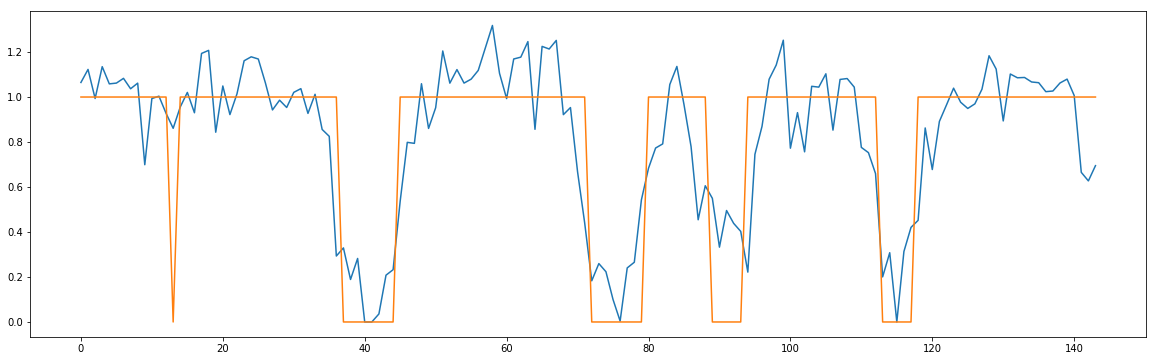

In [83]:
plt.figure(figsize=(20, 6))
plt.plot(p)
plt.plot(y)

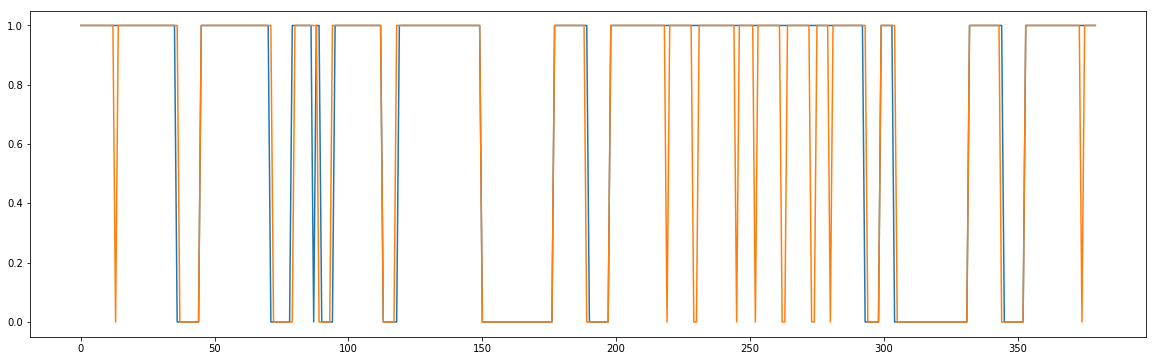

In [94]:
p = []
y = []
for i in range(0, len(enc_df_list[6])-9):
    p.append(round((predictions[i][5]).item()))
    y.append(allY[i][5])
    
plt.figure(figsize=(20, 6))
plt.plot(p)
plt.plot(y)

In [95]:
accuracy_score(y, p)

0.9394736842105263

In [2]:
extractor_test = Extract()

In [5]:
extractor= Extract()
df_list = extractor.extract_data_from_pdb('humans', True)
# extractor.save_to_csv()

File 1a02.pdb excluded
File 1a1u.pdb excluded
File 1a31.pdb excluded
File 1a5h.pdb excluded
File 1a5y.pdb excluded
File 1a66.pdb excluded
File 1a7f.pdb excluded
File 1a8j.pdb excluded
File 1aa2.pdb excluded
File 1aap.pdb excluded
File 1abj.pdb excluded
File 1ad5.pdb excluded
File 1adq.pdb excluded
File 1adz.pdb excluded
File 1ai0.pdb excluded
File 1aiy.pdb excluded
File 1ajj.pdb excluded
File 1ale.pdb excluded
File 1alf.pdb excluded
File 1amb.pdb excluded
File 1amc.pdb excluded
File 1aml.pdb excluded
File 1ant.pdb excluded
File 1ao3.pdb excluded
File 1aoa.pdb excluded
File 1apj.pdb excluded
File 1aqk.pdb excluded
File 1ark.pdb excluded
File 1atz.pdb excluded
File 1aue.pdb excluded
File 1auk.pdb excluded
File 1auq.pdb excluded
File 1aut.pdb excluded
File 1av5.pdb excluded
File 1aw0.pdb excluded
File 1awe.pdb excluded
File 1awh.pdb excluded
File 1azx.pdb excluded
File 1b1i.pdb excluded
File 1b2i.pdb excluded
File 1b38.pdb excluded
File 1b39.pdb excluded
File 1b4f.pdb excluded
File 1b4g.p

File 1hs5.pdb excluded
File 1hsq.pdb excluded
File 1hth.pdb excluded
File 1htj.pdb excluded
File 1htr.pdb excluded
File 1htv.pdb excluded
File 1huc.pdb excluded
File 1hui.pdb excluded
File 1hut.pdb excluded
File 1hvy.pdb excluded
File 1hw3.pdb excluded
File 1hw4.pdb excluded
File 1hyi.pdb excluded
File 1hyj.pdb excluded
File 1hyn.pdb excluded
File 1hz8.pdb excluded
File 1hzf.pdb excluded
File 1hzh.pdb excluded
File 1hzn.pdb excluded
File 1hzw.pdb excluded
File 1i00.pdb excluded
File 1i0u.pdb excluded
File 1i16.pdb excluded
File 1i2t.pdb excluded
File 1i3o.pdb excluded
File 1i44.pdb excluded
File 1i72.pdb excluded
File 1i79.pdb excluded
File 1i7b.pdb excluded
File 1i7c.pdb excluded
File 1i7m.pdb excluded
File 1i8h.pdb excluded
File 1ib2.pdb excluded
File 1idn.pdb excluded
File 1ie8.pdb excluded
File 1ie9.pdb excluded
File 1igm.pdb excluded
File 1ijb.pdb excluded
File 1ijr.pdb excluded
File 1ikl.pdb excluded
File 1ikm.pdb excluded
File 1ikt.pdb excluded
File 1ilr.pdb excluded
File 1imh.p

File 1pog.pdb excluded
File 1pou.pdb excluded
File 1ppb.pdb excluded
File 1ppg.pdb excluded
File 1prx.pdb excluded
File 1psi.pdb excluded
File 1pt9.pdb excluded
File 1pu4.pdb excluded
File 1pve.pdb excluded
File 1pwy.pdb excluded
File 1pzu.pdb excluded
File 1q02.pdb excluded
File 1q2z.pdb excluded
File 1q4n.pdb excluded
File 1q4v.pdb excluded
File 1q5u.pdb excluded
File 1q6n.pdb excluded
File 1q6p.pdb excluded
File 1q6s.pdb excluded
File 1q6t.pdb excluded
File 1q7d.pdb excluded
File 1q7x.pdb excluded
File 1q8l.pdb excluded
File 1q9p.pdb excluded
File 1qbk.pdb excluded
File 1qcf.pdb excluded
File 1qcm.pdb excluded
File 1qfa.pdb excluded
File 1qfk.pdb excluded
File 1qg1.pdb excluded
File 1qg3.pdb excluded
File 1qiy.pdb excluded
File 1qiz.pdb excluded
File 1qj0.pdb excluded
File 1qkl.pdb excluded
File 1qm9.pdb excluded
File 1qmv.pdb excluded
File 1qmz.pdb excluded
File 1qnd.pdb excluded
File 1qpc.pdb excluded
File 1qpd.pdb excluded
File 1qpe.pdb excluded
File 1qpj.pdb excluded
File 1qrp.p

File 1wtg.pdb excluded
File 1wun.pdb excluded
File 1wv7.pdb excluded
File 1wvn.pdb excluded
File 1wvo.pdb excluded
File 1wvz.pdb excluded
File 1wwa.pdb excluded
File 1wwb.pdb excluded
File 1wwu.pdb excluded
File 1www.pdb excluded
File 1wwx.pdb excluded
File 1wxp.pdb excluded
File 1wyl.pdb excluded
File 1wyq.pdb excluded
File 1wz9.pdb excluded
File 1x0h.pdb excluded
File 1x0o.pdb excluded
File 1x2l.pdb excluded
File 1x2n.pdb excluded
File 1x2q.pdb excluded
File 1x3a.pdb excluded
File 1x3b.pdb excluded
File 1x3c.pdb excluded
File 1x3h.pdb excluded
File 1x45.pdb excluded
File 1x47.pdb excluded
File 1x4g.pdb excluded
File 1x4i.pdb excluded
File 1x4j.pdb excluded
File 1x4l.pdb excluded
File 1x4p.pdb excluded
File 1x4u.pdb excluded
File 1x4w.pdb excluded
File 1x51.pdb excluded
File 1x52.pdb excluded
File 1x53.pdb excluded
File 1x5c.pdb excluded
File 1x5d.pdb excluded
File 1x5i.pdb excluded
File 1x5n.pdb excluded
File 1x5q.pdb excluded
File 1x5r.pdb excluded
File 1x5w.pdb excluded
File 1x61.p

File 2clw.pdb excluded
File 2cm0.pdb excluded
File 2cmw.pdb excluded
File 2cnj.pdb excluded
File 2coa.pdb excluded
File 2cob.pdb excluded
File 2coc.pdb excluded
File 2cod.pdb excluded
File 2cof.pdb excluded
File 2cok.pdb excluded
File 2com.pdb excluded
File 2coo.pdb excluded
File 2cot.pdb excluded
File 2cow.pdb excluded
File 2coz.pdb excluded
File 2cp0.pdb excluded
File 2cp8.pdb excluded
File 2cpu.pdb excluded
File 2cq7.pdb excluded
File 2cq8.pdb excluded
File 2cqq.pdb excluded
File 2cqr.pdb excluded
File 2cqy.pdb excluded
File 2cr4.pdb excluded
File 2cr9.pdb excluded
File 2cra.pdb excluded
File 2crf.pdb excluded
File 2crh.pdb excluded
File 2cry.pdb excluded
File 2cs1.pdb excluded
File 2cs3.pdb excluded
File 2cs5.pdb excluded
File 2cs8.pdb excluded
File 2csf.pdb excluded
File 2csh.pdb excluded
File 2csi.pdb excluded
File 2csp.pdb excluded
File 2csq.pdb excluded
File 2css.pdb excluded
File 2csv.pdb excluded
File 2csy.pdb excluded
File 2ct0.pdb excluded
File 2ct1.pdb excluded
File 2ct3.p

File 2eqe.pdb excluded
File 2eqf.pdb excluded
File 2eqg.pdb excluded
File 2eqr.pdb excluded
File 2eqx.pdb excluded
File 2etx.pdb excluded
File 2eva.pdb excluded
File 2evw.pdb excluded
File 2evz.pdb excluded
File 2ew9.pdb excluded
File 2exc.pdb excluded
File 2exg.pdb excluded
File 2f2s.pdb excluded
File 2f57.pdb excluded
File 2f5a.pdb excluded
File 2f60.pdb excluded
File 2f6j.pdb excluded
File 2f6n.pdb excluded
File 2f7m.pdb excluded
File 2f89.pdb excluded
File 2f8c.pdb excluded
File 2f8x.pdb excluded
File 2f8y.pdb excluded
File 2f8z.pdb excluded
File 2f92.pdb excluded
File 2f94.pdb excluded
File 2f9b.pdb excluded
File 2f9k.pdb excluded
File 2fai.pdb excluded
File 2fau.pdb excluded
File 2fb4.pdb excluded
File 2fbs.pdb excluded
File 2fbu.pdb excluded
File 2fc6.pdb excluded
File 2fc7.pdb excluded
File 2fc8.pdb excluded
File 2fc9.pdb excluded
File 2fcf.pdb excluded
File 2fcg.pdb excluded
File 2fda.pdb excluded
File 2fdb.pdb excluded
File 2ffx.pdb excluded
File 2fgw.pdb excluded
File 2fh7.p

File 2koe.pdb excluded
File 2koy.pdb excluded
File 2kpk.pdb excluded
File 2kq6.pdb excluded
File 2kqq.pdb excluded
File 2krb.pdb excluded
File 2krd.pdb excluded
File 2kre.pdb excluded
File 2krk.pdb excluded
File 2krr.pdb excluded
File 2ks1.pdb excluded
File 2ksg.pdb excluded
File 2kso.pdb excluded
File 2ksp.pdb excluded
File 2ksr.pdb excluded
File 2ktb.pdb excluded
File 2ku3.pdb excluded
File 2ku7.pdb excluded
File 2kv2.pdb excluded
File 2kv9.pdb excluded
File 2kvr.pdb excluded
File 2kvu.pdb excluded
File 2kw9.pdb excluded
File 2kwf.pdb excluded
File 2kwj.pdb excluded
File 2kwk.pdb excluded
File 2kwn.pdb excluded
File 2kwo.pdb excluded
File 2kx8.pdb excluded
File 2kxk.pdb excluded
File 2kxn.pdb excluded
File 2kxr.pdb excluded
File 2kyl.pdb excluded
File 2kyu.pdb excluded
File 2kz5.pdb excluded
File 2kzg.pdb excluded
File 2l0b.pdb excluded
File 2l0e.pdb excluded
File 2l0s.pdb excluded
File 2l1p.pdb excluded
File 2l1y.pdb excluded
File 2l1z.pdb excluded
File 2l27.pdb excluded
File 2l29.p

File 2o3m.pdb excluded
File 2o6g.pdb excluded
File 2o84.pdb excluded
File 2o8j.pdb excluded
File 2o8y.pdb excluded
File 2o93.pdb excluded
File 2obj.pdb excluded
File 2obu.pdb excluded
File 2oc2.pdb excluded
File 2ocf.pdb excluded
File 2od1.pdb excluded
File 2od3.pdb excluded
File 2odc.pdb excluded
File 2odd.pdb excluded
File 2odt.pdb excluded
File 2oeh.pdb excluded
File 2of2.pdb excluded
File 2of4.pdb excluded
File 2ofu.pdb excluded
File 2ogv.pdb excluded
File 2oh4.pdb excluded
File 2oi4.pdb excluded
File 2oib.pdb excluded
File 2oic.pdb excluded
File 2oid.pdb excluded
File 2oj4.pdb excluded
File 2oj9.pdb excluded
File 2ojr.pdb excluded
File 2okj.pdb excluded
File 2okk.pdb excluded
File 2old.pdb excluded
File 2oly.pdb excluded
File 2olz.pdb excluded
File 2om0.pdb excluded
File 2om1.pdb excluded
File 2omb.pdb excluded
File 2omg.pdb excluded
File 2omh.pdb excluded
File 2omi.pdb excluded
File 2omn.pdb excluded
File 2onb.pdb excluded
File 2oo4.pdb excluded
File 2oo8.pdb excluded
File 2ooq.p

File 2wv8.pdb excluded
File 2wwe.pdb excluded
File 2wwk.pdb excluded
File 2wwm.pdb excluded
File 2wyz.pdb excluded
File 2wz1.pdb excluded
File 2x04.pdb excluded
File 2x1x.pdb excluded
File 2x25.pdb excluded
File 2x2a.pdb excluded
File 2x2e.pdb excluded
File 2x2f.pdb excluded
File 2x2k.pdb excluded
File 2x2l.pdb excluded
File 2x2m.pdb excluded
File 2x35.pdb excluded
File 2x39.pdb excluded
File 2x44.pdb excluded
File 2x4w.pdb excluded
File 2x4x.pdb excluded
File 2x4y.pdb excluded
File 2x4z.pdb excluded
File 2x57.pdb excluded
File 2x7f.pdb excluded
File 2x7g.pdb excluded
File 2xa4.pdb excluded
File 2xa8.pdb excluded
File 2xb7.pdb excluded
File 2xba.pdb excluded
File 2xc7.pdb excluded
File 2xch.pdb excluded
File 2xck.pdb excluded
File 2xeb.pdb excluded
File 2xeu.pdb excluded
File 2xh5.pdb excluded
File 2xhd.pdb excluded
File 2xik.pdb excluded
File 2xir.pdb excluded
File 2xix.pdb excluded
File 2xiy.pdb excluded
File 2xiz.pdb excluded
File 2xj1.pdb excluded
File 2xj2.pdb excluded
File 2xjf.p

File 3dds.pdb excluded
File 3ddt.pdb excluded
File 3ddw.pdb excluded
File 3deh.pdb excluded
File 3dei.pdb excluded
File 3dej.pdb excluded
File 3dek.pdb excluded
File 3dey.pdb excluded
File 3dfc.pdb excluded
File 3dgc.pdb excluded
File 3dhp.pdb excluded
File 3dj9.pdb excluded
File 3djg.pdb excluded
File 3dju.pdb excluded
File 3djy.pdb excluded
File 3dkc.pdb excluded
File 3dkf.pdb excluded
File 3dkg.pdb excluded
File 3dkk.pdb excluded
File 3dkm.pdb excluded
File 3dlq.pdb excluded
File 3dls.pdb excluded
File 3dmw.pdb excluded
File 3do3.pdb excluded
File 3dpk.pdb excluded
File 3dpl.pdb excluded
File 3dqv.pdb excluded
File 3dtw.pdb excluded
File 3dwy.pdb excluded
File 3dx9.pdb excluded
File 3dy6.pdb excluded
File 3dz2.pdb excluded
File 3dz3.pdb excluded
File 3dz4.pdb excluded
File 3dz5.pdb excluded
File 3dz6.pdb excluded
File 3dz7.pdb excluded
File 3e0n.pdb excluded
File 3e0p.pdb excluded
File 3e16.pdb excluded
File 3e17.pdb excluded
File 3e1x.pdb excluded
File 3e3b.pdb excluded
File 3e5a.p

File 3krr.pdb excluded
File 3kse.pdb excluded
File 3ktv.pdb excluded
File 3kuq.pdb excluded
File 3kuz.pdb excluded
File 3kvw.pdb excluded
File 3kvx.pdb excluded
File 3kw6.pdb excluded
File 3kwb.pdb excluded
File 3kxv.pdb excluded
File 3kxz.pdb excluded
File 3kyk.pdb excluded
File 3kz1.pdb excluded
File 3kzj.pdb excluded
File 3l00.pdb excluded
File 3l0b.pdb excluded
File 3l1x.pdb excluded
File 3l2o.pdb excluded
File 3l3l.pdb excluded
File 3l3m.pdb excluded
File 3l3n.pdb excluded
File 3l42.pdb excluded
File 3l4h.pdb excluded
File 3l6a.pdb excluded
File 3l6r.pdb excluded
File 3l8j.pdb excluded
File 3l8n.pdb excluded
File 3l8p.pdb excluded
File 3l8v.pdb excluded
File 3l95.pdb excluded
File 3l9j.pdb excluded
File 3l9l.pdb excluded
File 3l9m.pdb excluded
File 3l9n.pdb excluded
File 3l9p.pdb excluded
File 3lbj.pdb excluded
File 3lcd.pdb excluded
File 3lck.pdb excluded
File 3lco.pdb excluded
File 3lcs.pdb excluded
File 3lct.pdb excluded
File 3lcy.pdb excluded
File 3lgf.pdb excluded
File 3lgl.p

File 3qxr.pdb excluded
File 3qxy.pdb excluded
File 3qyb.pdb excluded
File 3qye.pdb excluded
File 3r17.pdb excluded
File 3r1g.pdb excluded
File 3r3g.pdb excluded
File 3r62.pdb excluded
File 3r7o.pdb excluded
File 3r7x.pdb excluded
File 3r85.pdb excluded
File 3r9a.pdb excluded
File 3rap.pdb excluded
File 3rbn.pdb excluded
File 3rbs.pdb excluded
File 3rc0.pdb excluded
File 3rcd.pdb excluded
File 3rch.pdb excluded
File 3rci.pdb excluded
File 3rcj.pdb excluded
File 3rck.pdb excluded
File 3rd9.pdb excluded
File 3rda.pdb excluded
File 3rgh.pdb excluded
File 3rhk.pdb excluded
File 3rj3.pdb excluded
File 3rjw.pdb excluded
File 3rn8.pdb excluded
File 3rnn.pdb excluded
File 3rov.pdb excluded
File 3rul.pdb excluded
File 3rvg.pdb excluded
File 3rwp.pdb excluded
File 3rwq.pdb excluded
File 3ry6.pdb excluded
File 3ryj.pdb excluded
File 3ryv.pdb excluded
File 3ryx.pdb excluded
File 3rz0.pdb excluded
File 3rz1.pdb excluded
File 3s1b.pdb excluded
File 3s5o.pdb excluded
File 3s71.pdb excluded
File 3s72.p

File 4aoi.pdb excluded
File 4ap7.pdb excluded
File 4apd.pdb excluded
File 4app.pdb excluded
File 4apu.pdb excluded
File 4aqc.pdb excluded
File 4asc.pdb excluded
File 4asd.pdb excluded
File 4ase.pdb excluded
File 4asi.pdb excluded
File 4ask.pdb excluded
File 4asz.pdb excluded
File 4at3.pdb excluded
File 4at4.pdb excluded
File 4at5.pdb excluded
File 4avu.pdb excluded
File 4avw.pdb excluded
File 4avx.pdb excluded
File 4aw0.pdb excluded
File 4aw1.pdb excluded
File 4aw5.pdb excluded
File 4awj.pdb excluded
File 4axb.pdb excluded
File 4ay6.pdb excluded
File 4ayw.pdb excluded
File 4aze.pdb excluded
File 4azf.pdb excluded
File 4b0o.pdb excluded
File 4b0p.pdb excluded
File 4b1h.pdb excluded
File 4b1j.pdb excluded
File 4b3f.pdb excluded
File 4b4c.pdb excluded
File 4b53.pdb excluded
File 4b7i.pdb excluded
File 4b87.pdb excluded
File 4b9k.pdb excluded
File 4ba9.pdb excluded
File 4bbe.pdb excluded
File 4bbf.pdb excluded
File 4bcf.pdb excluded
File 4bcg.pdb excluded
File 4bch.pdb excluded
File 4bci.p

File 4f93.pdb excluded
File 4f99.pdb excluded
File 4f9a.pdb excluded
File 4f9b.pdb excluded
File 4f9c.pdb excluded
File 4fao.pdb excluded
File 4fdc.pdb excluded
File 4fdd.pdb excluded
File 4fdi.pdb excluded
File 4fdj.pdb excluded
File 4fg3.pdb excluded
File 4fie.pdb excluded
File 4fif.pdb excluded
File 4fig.pdb excluded
File 4fih.pdb excluded
File 4fii.pdb excluded
File 4fij.pdb excluded
File 4fk6.pdb excluded
File 4fka.pdb excluded
File 4fkg.pdb excluded
File 4fki.pdb excluded
File 4fkj.pdb excluded
File 4fkl.pdb excluded
File 4fko.pdb excluded
File 4fkp.pdb excluded
File 4fkq.pdb excluded
File 4fkr.pdb excluded
File 4fks.pdb excluded
File 4fkt.pdb excluded
File 4fku.pdb excluded
File 4fkv.pdb excluded
File 4fkw.pdb excluded
File 4fl5.pdb excluded
File 4fmu.pdb excluded
File 4fnl.pdb excluded
File 4fnw.pdb excluded
File 4fnx.pdb excluded
File 4fny.pdb excluded
File 4fnz.pdb excluded
File 4fo6.pdb excluded
File 4fob.pdb excluded
File 4foc.pdb excluded
File 4fod.pdb excluded
File 4fq1.p

File 4l0i.pdb excluded
File 4l0n.pdb excluded
File 4l0r.pdb excluded
File 4l0s.pdb excluded
File 4l0t.pdb excluded
File 4l0v.pdb excluded
File 4l10.pdb excluded
File 4l2f.pdb excluded
File 4l2g.pdb excluded
File 4l2k.pdb excluded
File 4l2x.pdb excluded
File 4l31.pdb excluded
File 4l32.pdb excluded
File 4l33.pdb excluded
File 4l34.pdb excluded
File 4l3p.pdb excluded
File 4l3t.pdb excluded
File 4l46.pdb excluded
File 4l4j.pdb excluded
File 4l52.pdb excluded
File 4l53.pdb excluded
File 4l58.pdb excluded
File 4l67.pdb excluded
File 4l6e.pdb excluded
File 4l7e.pdb excluded
File 4l7w.pdb excluded
File 4l7x.pdb excluded
File 4l8r.pdb excluded
File 4l8t.pdb excluded
File 4lac.pdb excluded
File 4ldk.pdb excluded
File 4lfh.pdb excluded
File 4lfv.pdb excluded
File 4lgd.pdb excluded
File 4li5.pdb excluded
File 4li6.pdb excluded
File 4li7.pdb excluded
File 4li8.pdb excluded
File 4lik.pdb excluded
File 4lil.pdb excluded
File 4ljq.pdb excluded
File 4lld.pdb excluded
File 4lli.pdb excluded
File 4llm.p

File 4qve.pdb excluded
File 4qvf.pdb excluded
File 4qvx.pdb excluded
File 4qxg.pdb excluded
File 4qxs.pdb excluded
File 4qxx.pdb excluded
File 4qy4.pdb excluded
File 4qyd.pdb excluded
File 4qyl.pdb excluded
File 4qzs.pdb excluded
File 4r0i.pdb excluded
File 4r1v.pdb excluded
File 4r1y.pdb excluded
File 4r3c.pdb excluded
File 4r3p.pdb excluded
File 4r3r.pdb excluded
File 4r5a.pdb excluded
File 4r5s.pdb excluded
File 4r7h.pdb excluded
File 4r7i.pdb excluded
File 4r8q.pdb excluded
File 4ra4.pdb excluded
File 4ra5.pdb excluded
File 4rbl.pdb excluded
File 4rbp.pdb excluded
File 4rc2.pdb excluded
File 4rc3.pdb excluded
File 4rc4.pdb excluded
File 4re8.pdb excluded
File 4ree.pdb excluded
File 4ref.pdb excluded
File 4rer.pdb excluded
File 4rg2.pdb excluded
File 4rg6.pdb excluded
File 4rg7.pdb excluded
File 4rg9.pdb excluded
File 4rgw.pdb excluded
File 4rio.pdb excluded
File 4rj3.pdb excluded
File 4rj4.pdb excluded
File 4rj5.pdb excluded
File 4rj6.pdb excluded
File 4rj7.pdb excluded
File 4rj8.p

File 4yjv.pdb excluded
File 4yk0.pdb excluded
File 4yk6.pdb excluded
File 4yl0.pdb excluded
File 4yli.pdb excluded
File 4ylj.pdb excluded
File 4ylk.pdb excluded
File 4yll.pdb excluded
File 4ylq.pdb excluded
File 4ymd.pdb excluded
File 4ymj.pdb excluded
File 4ynm.pdb excluded
File 4ynp.pdb excluded
File 4yo6.pdb excluded
File 4yoo.pdb excluded
File 4yp8.pdb excluded
File 4ypa.pdb excluded
File 4ype.pdb excluded
File 4ypu.pdb excluded
File 4yt6.pdb excluded
File 4yt7.pdb excluded
File 4ytc.pdb excluded
File 4ytf.pdb excluded
File 4yth.pdb excluded
File 4yti.pdb excluded
File 4yu2.pdb excluded
File 4yym.pdb excluded
File 4yyn.pdb excluded
File 4yzc.pdb excluded
File 4z02.pdb excluded
File 4z15.pdb excluded
File 4z16.pdb excluded
File 4z1t.pdb excluded
File 4z1u.pdb excluded
File 4z2m.pdb excluded
File 4z49.pdb excluded
File 4z4p.pdb excluded
File 4z55.pdb excluded
File 4z6a.pdb excluded
File 4z8g.pdb excluded
File 4z93.pdb excluded
File 4z9v.pdb excluded
File 4zau.pdb excluded
File 4zd3.p

File 5edi.pdb excluded
File 5edk.pdb excluded
File 5edm.pdb excluded
File 5ee5.pdb excluded
File 5efq.pdb excluded
File 5egb.pdb excluded
File 5eh2.pdb excluded
File 5eh4.pdb excluded
File 5eh6.pdb excluded
File 5ei9.pdb excluded
File 5eic.pdb excluded
File 5eig.pdb excluded
File 5em6.pdb excluded
File 5em7.pdb excluded
File 5em8.pdb excluded
File 5ems.pdb excluded
File 5emv.pdb excluded
File 5emw.pdb excluded
File 5emy.pdb excluded
File 5en9.pdb excluded
File 5ena.pdb excluded
File 5enb.pdb excluded
File 5enc.pdb excluded
File 5ene.pdb excluded
File 5enf.pdb excluded
File 5eng.pdb excluded
File 5enh.pdb excluded
File 5eni.pdb excluded
File 5enj.pdb excluded
File 5eob.pdb excluded
File 5ep7.pdb excluded
File 5epb.pdb excluded
File 5ety.pdb excluded
File 5eun.pdb excluded
File 5euq.pdb excluded
File 5ew1.pdb excluded
File 5ew2.pdb excluded
File 5ew3.pdb excluded
File 5ew4.pdb excluded
File 5ew7.pdb excluded
File 5ew9.pdb excluded
File 5ewi.pdb excluded
File 5exl.pdb excluded
File 5exm.p

File 5jdd.pdb excluded
File 5jde.pdb excluded
File 5jdj.pdb excluded
File 5jdu.pdb excluded
File 5jdv.pdb excluded
File 5je7.pdb excluded
File 5jeg.pdb excluded
File 5jeh.pdb excluded
File 5jep.pdb excluded
File 5jes.pdb excluded
File 5jfs.pdb excluded
File 5jfv.pdb excluded
File 5jfw.pdb excluded
File 5jfx.pdb excluded
File 5jg3.pdb excluded
File 5jg5.pdb excluded
File 5jga.pdb excluded
File 5jgb.pdb excluded
File 5jgd.pdb excluded
File 5jgs.pdb excluded
File 5jgt.pdb excluded
File 5jh5.pdb excluded
File 5jh6.pdb excluded
File 5jhg.pdb excluded
File 5jhh.pdb excluded
File 5jhn.pdb excluded
File 5jhw.pdb excluded
File 5jih.pdb excluded
File 5jii.pdb excluded
File 5jik.pdb excluded
File 5jin.pdb excluded
File 5jiy.pdb excluded
File 5jj0.pdb excluded
File 5jjy.pdb excluded
File 5jk3.pdb excluded
File 5jlb.pdb excluded
File 5jle.pdb excluded
File 5jmm.pdb excluded
File 5jn5.pdb excluded
File 5jo3.pdb excluded
File 5joe.pdb excluded
File 5jr1.pdb excluded
File 5jrp.pdb excluded
File 5jti.p

File 5nhw.pdb excluded
File 5nlk.pdb excluded
File 5nlv.pdb excluded
File 5nly.pdb excluded
File 5nmn.pdb excluded
File 5nn3.pdb excluded
File 5nn5.pdb excluded
File 5nn6.pdb excluded
File 5nn8.pdb excluded
File 5nnk.pdb excluded
File 5nnm.pdb excluded
File 5nnt.pdb excluded
File 5nnx.pdb excluded
File 5nob.pdb excluded
File 5np2.pdb excluded
File 5np5.pdb excluded
File 5nqe.pdb excluded
File 5nrw.pdb excluded
File 5nsp.pdb excluded
File 5nsx.pdb excluded
File 5nt0.pdb excluded
File 5nt4.pdb excluded
File 5ntt.pdb excluded
File 5nu3.pdb excluded
File 5nu5.pdb excluded
File 5nut.pdb excluded
File 5nvc.pdb excluded
File 5nve.pdb excluded
File 5nvf.pdb excluded
File 5nvg.pdb excluded
File 5nvh.pdb excluded
File 5nvs.pdb excluded
File 5nvu.pdb excluded
File 5nvv.pdb excluded
File 5nvw.pdb excluded
File 5nvx.pdb excluded
File 5nvy.pdb excluded
File 5nvz.pdb excluded
File 5nw0.pdb excluded
File 5nw1.pdb excluded
File 5nw2.pdb excluded
File 5nwb.pdb excluded
File 5nwc.pdb excluded
File 5nwd.p

File 5por.pdb excluded
File 5pos.pdb excluded
File 5pot.pdb excluded
File 5pou.pdb excluded
File 5pov.pdb excluded
File 5pow.pdb excluded
File 5pox.pdb excluded
File 5poy.pdb excluded
File 5poz.pdb excluded
File 5pp0.pdb excluded
File 5pp1.pdb excluded
File 5pp2.pdb excluded
File 5pp3.pdb excluded
File 5pp4.pdb excluded
File 5pp5.pdb excluded
File 5pp6.pdb excluded
File 5pp7.pdb excluded
File 5pp8.pdb excluded
File 5pp9.pdb excluded
File 5ppa.pdb excluded
File 5ppb.pdb excluded
File 5ppc.pdb excluded
File 5ppd.pdb excluded
File 5ppe.pdb excluded
File 5ppf.pdb excluded
File 5ppg.pdb excluded
File 5pph.pdb excluded
File 5ppi.pdb excluded
File 5ppj.pdb excluded
File 5ppk.pdb excluded
File 5ppl.pdb excluded
File 5ppm.pdb excluded
File 5ppn.pdb excluded
File 5ppo.pdb excluded
File 5ppp.pdb excluded
File 5ppq.pdb excluded
File 5ppr.pdb excluded
File 5pps.pdb excluded
File 5ppt.pdb excluded
File 5ppu.pdb excluded
File 5ppv.pdb excluded
File 5ppw.pdb excluded
File 5ppx.pdb excluded
File 5ppy.p

File 5q3y.pdb excluded
File 5q3z.pdb excluded
File 5q40.pdb excluded
File 5q41.pdb excluded
File 5q42.pdb excluded
File 5q43.pdb excluded
File 5q44.pdb excluded
File 5q45.pdb excluded
File 5q46.pdb excluded
File 5q47.pdb excluded
File 5q48.pdb excluded
File 5q49.pdb excluded
File 5q4a.pdb excluded
File 5q4b.pdb excluded
File 5q4c.pdb excluded
File 5q4d.pdb excluded
File 5q4e.pdb excluded
File 5q4f.pdb excluded
File 5q4g.pdb excluded
File 5q4h.pdb excluded
File 5q4i.pdb excluded
File 5q4j.pdb excluded
File 5q4k.pdb excluded
File 5q4l.pdb excluded
File 5q4m.pdb excluded
File 5q4n.pdb excluded
File 5q4o.pdb excluded
File 5q4p.pdb excluded
File 5q4q.pdb excluded
File 5q4r.pdb excluded
File 5q4s.pdb excluded
File 5q4t.pdb excluded
File 5q4u.pdb excluded
File 5q4v.pdb excluded
File 5q4w.pdb excluded
File 5q4x.pdb excluded
File 5q4y.pdb excluded
File 5q4z.pdb excluded
File 5q50.pdb excluded
File 5q51.pdb excluded
File 5q52.pdb excluded
File 5q53.pdb excluded
File 5q54.pdb excluded
File 5q55.p

File 5tts.pdb excluded
File 5ttu.pdb excluded
File 5ttv.pdb excluded
File 5tuy.pdb excluded
File 5tuz.pdb excluded
File 5tww.pdb excluded
File 5txd.pdb excluded
File 5txk.pdb excluded
File 5ty6.pdb excluded
File 5tz2.pdb excluded
File 5tz3.pdb excluded
File 5tz9.pdb excluded
File 5tza.pdb excluded
File 5tzc.pdb excluded
File 5tzh.pdb excluded
File 5tzl.pdb excluded
File 5tzm.pdb excluded
File 5tzt.pdb excluded
File 5tzu.pdb excluded
File 5tzw.pdb excluded
File 5tzx.pdb excluded
File 5tzz.pdb excluded
File 5u00.pdb excluded
File 5u0r.pdb excluded
File 5u2b.pdb excluded
File 5u2d.pdb excluded
File 5u2j.pdb excluded
File 5u3a.pdb excluded
File 5u3p.pdb excluded
File 5u3q.pdb excluded
File 5u3r.pdb excluded
File 5u3s.pdb excluded
File 5u3t.pdb excluded
File 5u3u.pdb excluded
File 5u3v.pdb excluded
File 5u3w.pdb excluded
File 5u3x.pdb excluded
File 5u3y.pdb excluded
File 5u3z.pdb excluded
File 5u40.pdb excluded
File 5u41.pdb excluded
File 5u42.pdb excluded
File 5u43.pdb excluded
File 5u44.p

File 6alb.pdb excluded
File 6alc.pdb excluded
File 6amm.pdb excluded
File 6ao0.pdb excluded
File 6ao5.pdb excluded
File 6ap9.pdb excluded
File 6apc.pdb excluded
File 6ath.pdb excluded
File 6au4.pdb excluded
File 6au6.pdb excluded
File 6avn.pdb excluded
File 6axd.pdb excluded
File 6axq.pdb excluded
File 6ay3.pdb excluded
File 6ay5.pdb excluded
File 6aze.pdb excluded
File 6b0o.pdb excluded
File 6b0p.pdb excluded
File 6b0q.pdb excluded
File 6b0r.pdb excluded
File 6b0w.pdb excluded
File 6b1u.pdb excluded
File 6b25.pdb excluded
File 6b29.pdb excluded
File 6b2e.pdb excluded
File 6b3d.pdb excluded
File 6b3e.pdb excluded
File 6b41.pdb excluded
File 6b79.pdb excluded
File 6b8j.pdb excluded
File 6b8l.pdb excluded
File 6b8m.pdb excluded
File 6b8n.pdb excluded
File 6b8p.pdb excluded
File 6b8q.pdb excluded
File 6b96.pdb excluded
File 6b97.pdb excluded
File 6b98.pdb excluded
File 6ba2.pdb excluded
File 6ba4.pdb excluded
File 6bbu.pdb excluded
File 6bbv.pdb excluded
File 6bc0.pdb excluded
File 6bca.p

File 6fmk.pdb excluded
File 6fof.pdb excluded
File 6fqo.pdb excluded
File 6fqp.pdb excluded
File 6fqu.pdb excluded
File 6fr0.pdb excluded
File 6fr2.pdb excluded
File 6frf.pdb excluded
File 6ftq.pdb excluded
File 6fuk.pdb excluded
File 6ful.pdb excluded
File 6fzv.pdb excluded
File 6fzw.pdb excluded
File 6g0i.pdb excluded
File 6g0j.pdb excluded
File 6g0w.pdb excluded
File 6g2d.pdb excluded
File 6g2h.pdb excluded
File 6g2i.pdb excluded
File 6g2n.pdb excluded
File 6g33.pdb excluded
File 6g34.pdb excluded
File 6g35.pdb excluded
File 6g36.pdb excluded
File 6g4q.pdb excluded
File 6g4w.pdb excluded
File 6g6s.pdb excluded
File 6g79.pdb excluded
File 6g8f.pdb excluded
File 6g8x.pdb excluded
File 6g91.pdb excluded
File 6g92.pdb excluded
File 6g93.pdb excluded
File 6g97.pdb excluded
File 6g9a.pdb excluded
File 6g9d.pdb excluded
File 6g9h.pdb excluded
File 6g9j.pdb excluded
File 6g9k.pdb excluded
File 6g9m.pdb excluded
File 6g9n.pdb excluded
File 6gdh.pdb excluded
File 6gdm.pdb excluded
File 6gdn.p

AttributeError: 'Extract' object has no attribute 'save_to_csv'

In [3]:
path = './data/humans/'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + f
    protein_df_list.append(pd.read_csv(file_path))

In [2]:
extract = Extract()
# one_hot_encoded_list = extract.get_one_hot_encoding(protein_df_list)

In [20]:
# extract test set
np.random.shuffle(files_list) # shuffle files
test_set_list = files_list[:5000]
test_set_path = path + 'test'
if not os.path.exists(test_set_path):
    os.mkdir(test_set_path)
for f in test_set_list:
    curr_path = path + f
    new_path = test_set_path + '/' + f
    os.rename(curr_path, new_path)

In [4]:
df_mouse_list = extract.extract_data_from_pdb('mouse', True)

File 12e8.pdb excluded
File 15c8.pdb excluded
File 1a0q.pdb excluded
File 1a18.pdb excluded
File 1a1f.pdb excluded
File 1a1g.pdb excluded
File 1a1h.pdb excluded
File 1a1i.pdb excluded
File 1a1j.pdb excluded
File 1a1k.pdb excluded
File 1a1l.pdb excluded
File 1a2d.pdb excluded
File 1a3l.pdb excluded
File 1a3p.pdb excluded
File 1a5f.pdb excluded
File 1a6u.pdb excluded
File 1a6v.pdb excluded
File 1a6w.pdb excluded
File 1a7n.pdb excluded
File 1a7o.pdb excluded
File 1a7p.pdb excluded
File 1a7q.pdb excluded
File 1a7r.pdb excluded
File 1aay.pdb excluded
File 1acd.pdb excluded
File 1ae6.pdb excluded
File 1aft.pdb excluded
File 1aif.pdb excluded
File 1aoj.pdb excluded
File 1apm.pdb excluded
File 1atp.pdb excluded
File 1awj.pdb excluded
File 1axt.pdb excluded
File 1ay1.pdb excluded
File 1baf.pdb excluded
File 1bbd.pdb excluded
File 1bet.pdb excluded
File 1bfv.pdb excluded
File 1bg1.pdb excluded
File 1bkx.pdb excluded
File 1bm3.pdb excluded
File 1btg.pdb excluded
File 1btn.pdb excluded
File 1bwm.p

File 1v9d.pdb excluded
File 1va8.pdb excluded
File 1vae.pdb excluded
File 1veg.pdb excluded
File 1veh.pdb excluded
File 1vej.pdb excluded
File 1vj6.pdb excluded
File 1vpo.pdb excluded
File 1wem.pdb excluded
File 1wen.pdb excluded
File 1weq.pdb excluded
File 1wes.pdb excluded
File 1weu.pdb excluded
File 1wev.pdb excluded
File 1wff.pdb excluded
File 1wfl.pdb excluded
File 1wfw.pdb excluded
File 1wfy.pdb excluded
File 1wg6.pdb excluded
File 1wgf.pdb excluded
File 1wgq.pdb excluded
File 1wgs.pdb excluded
File 1wgu.pdb excluded
File 1whd.pdb excluded
File 1whg.pdb excluded
File 1whj.pdb excluded
File 1whk.pdb excluded
File 1wi7.pdb excluded
File 1wi9.pdb excluded
File 1wic.pdb excluded
File 1wih.pdb excluded
File 1wik.pdb excluded
File 1wj5.pdb excluded
File 1wjn.pdb excluded
File 1wjw.pdb excluded
File 1wln.pdb excluded
File 1wr3.pdb excluded
File 1wr4.pdb excluded
File 1wr7.pdb excluded
File 1wu3.pdb excluded
File 1wxa.pdb excluded
File 1wxu.pdb excluded
File 1wys.pdb excluded
File 1wz1.p

File 3bi9.pdb excluded
File 3bia.pdb excluded
File 3bib.pdb excluded
File 3bkc.pdb excluded
File 3bkm.pdb excluded
File 3bod.pdb excluded
File 3bpc.pdb excluded
File 3brg.pdb excluded
File 3c4b.pdb excluded
File 3c4t.pdb excluded
File 3c6l.pdb excluded
File 3cfc.pdb excluded
File 3cle.pdb excluded
File 3clf.pdb excluded
File 3cmo.pdb excluded
File 3cvi.pdb excluded
File 3d14.pdb excluded
File 3d15.pdb excluded
File 3d2i.pdb excluded
File 3d2k.pdb excluded
File 3d4i.pdb excluded
File 3d6a.pdb excluded
File 3d84.pdb excluded
File 3db1.pdb excluded
File 3dfv.pdb excluded
File 3dj5.pdb excluded
File 3dj6.pdb excluded
File 3dj7.pdb excluded
File 3djn.pdb excluded
File 3dk6.pdb excluded
File 3dk7.pdb excluded
File 3dl4.pdb excluded
File 3dl7.pdb excluded
File 3dyj.pdb excluded
File 3e2f.pdb excluded
File 3e2z.pdb excluded
File 3e8u.pdb excluded
File 3edx.pdb excluded
File 3egf.pdb excluded
File 3emn.pdb excluded
File 3eot.pdb excluded
File 3esu.pdb excluded
File 3esv.pdb excluded
File 3et9.p

File 5khg.pdb excluded
File 5khh.pdb excluded
File 5khi.pdb excluded
File 5khk.pdb excluded
File 5kj4.pdb excluded
File 5kpj.pdb excluded
File 5krb.pdb excluded
File 5l23.pdb excluded
File 5l7n.pdb excluded
File 5l7x.pdb excluded
File 5l88.pdb excluded
File 5l9d.pdb excluded
File 5lgb.pdb excluded
File 5lgh.pdb excluded
File 5lsn.pdb excluded
File 5lxq.pdb excluded
File 5lzn.pdb excluded
File 5m0w.pdb excluded
File 5mbx.pdb excluded
File 5mc9.pdb excluded
File 5mhe.pdb excluded
File 5mhf.pdb excluded
File 5mhg.pdb excluded
File 5ml0.pdb excluded
File 5mth.pdb excluded
File 5muq.pdb excluded
File 5mvj.pdb excluded
File 5mx3.pdb excluded
File 5my0.pdb excluded
File 5n2o.pdb excluded
File 5nv1.pdb excluded
File 5nvj.pdb excluded
File 5nxj.pdb excluded
File 5obf.pdb excluded
File 5opy.pdb excluded
File 5tfk.pdb excluded
File 5tr8.pdb excluded
File 5tx2.pdb excluded
File 5tx6.pdb excluded
File 5u7g.pdb excluded
File 5u85.pdb excluded
File 5ug7.pdb excluded
File 5ulu.pdb excluded
File 5umz.p

In [9]:
path = './data/yeast/csv/'
files_list = os.listdir(path)
protein_df_list = []

np.random.shuffle(files_list) # shuffle files
test_set_list = files_list[:480]
test_set_path = path + 'test'
if not os.path.exists(test_set_path):
    os.mkdir(test_set_path)
for f in test_set_list:
    curr_path = path + f
    new_path = test_set_path + '/' + f
    os.rename(curr_path, new_path)

In [5]:
# mouse to one hot csv
path = './data/mouse/train'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + '/' + f
    protein_df_list.append(pd.read_csv(file_path))

lst = extract.get_one_hot_encoding(protein_df_list, True, path)

path = './data/mouse/test'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + '/' + f
    protein_df_list.append(pd.read_csv(file_path))

lst = extract.get_one_hot_encoding(protein_df_list, True, path)

In [7]:
# humans to one hot csv
path = './data/humans/train'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + '/' + f
    protein_df_list.append(pd.read_csv(file_path))

lst = extract.get_one_hot_encoding(protein_df_list, True, path)

path = './data/humans/test'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + '/' + f
    protein_df_list.append(pd.read_csv(file_path))

lst = extract.get_one_hot_encoding(protein_df_list, True, path)

In [10]:
# yeast to one hot csv
path = './data/yeast/train'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + '/' + f
    protein_df_list.append(pd.read_csv(file_path))

lst = extract.get_one_hot_encoding(protein_df_list, True, path)

path = './data/yeast/test'
files_list = os.listdir(path)
protein_df_list = []
for f in files_list:
    file_path = path + '/' + f
    protein_df_list.append(pd.read_csv(file_path))

lst = extract.get_one_hot_encoding(protein_df_list, True, path)

In [8]:
# extract yeast
df_yeast_list = extract.extract_data_from_pdb('yeast', True)

File 1a0a.pdb excluded
File 1a48.pdb excluded
File 1aoo.pdb excluded
File 1apl.pdb excluded
File 1aqq.pdb excluded
File 1aqs.pdb excluded
File 1chh.pdb excluded
File 1chi.pdb excluded
File 1chj.pdb excluded
File 1cie.pdb excluded
File 1cif.pdb excluded
File 1cig.pdb excluded
File 1cih.pdb excluded
File 1crg.pdb excluded
File 1crh.pdb excluded
File 1cri.pdb excluded
File 1crj.pdb excluded
File 1csu.pdb excluded
File 1csv.pdb excluded
File 1csw.pdb excluded
File 1csx.pdb excluded
File 1cty.pdb excluded
File 1ctz.pdb excluded
File 1d8b.pdb excluded
File 1e0n.pdb excluded
File 1ehz.pdb excluded
File 1ek0.pdb excluded
File 1fcw.pdb excluded
File 1fhb.pdb excluded
File 1fot.pdb excluded
File 1fw8.pdb excluded
File 1g6q.pdb excluded
File 1gcl.pdb excluded
File 1gcm.pdb excluded
File 1gky.pdb excluded
File 1gpp.pdb excluded
File 1h1j.pdb excluded
File 1hkg.pdb excluded
File 1how.pdb excluded
File 1hqz.pdb excluded
File 1hwt.pdb excluded
File 1i3q.pdb excluded
File 1i45.pdb excluded
File 1i50.p

File 3lrv.pdb excluded
File 3lsu.pdb excluded
File 3lwt.pdb excluded
File 3m48.pdb excluded
File 3mc6.pdb excluded
File 3mii.pdb excluded
File 3mks.pdb excluded
File 3mmi.pdb excluded
File 3mnm.pdb excluded
File 3mv2.pdb excluded
File 3mv3.pdb excluded
File 3mwy.pdb excluded
File 3mzl.pdb excluded
File 3o4z.pdb excluded
File 3opb.pdb excluded
File 3osm.pdb excluded
File 3ost.pdb excluded
File 3pgk.pdb excluded
File 3pgq.pdb excluded
File 3pr6.pdb excluded
File 3psj.pdb excluded
File 3psk.pdb excluded
File 3q35.pdb excluded
File 3qm0.pdb excluded
File 3rfg.pdb excluded
File 3rfh.pdb excluded
File 3rwm.pdb excluded
File 3sbg.pdb excluded
File 3sbt.pdb excluded
File 3sdj.pdb excluded
File 3sdm.pdb excluded
File 3sq8.pdb excluded
File 3t7i.pdb excluded
File 3t7j.pdb excluded
File 3t7k.pdb excluded
File 3ted.pdb excluded
File 3tl4.pdb excluded
File 3to6.pdb excluded
File 3to7.pdb excluded
File 3to9.pdb excluded
File 3tra.pdb excluded
File 3tv5.pdb excluded
File 3tvu.pdb excluded
File 3tvw.p

In [9]:
# extract humans
# df_humans_list = extract.extract_data_from_pdb('humans', True)

# create test set

# files_list = os.listdir(path)
# protein_df_list = []



File 1a02.pdb excluded
File 1a0n.pdb excluded
File 1a1u.pdb excluded
File 1a31.pdb excluded
File 1a5h.pdb excluded
File 1a5y.pdb excluded
File 1a66.pdb excluded
File 1a7f.pdb excluded
File 1a8j.pdb excluded
File 1aa2.pdb excluded
File 1aap.pdb excluded
File 1abj.pdb excluded
File 1ad5.pdb excluded
File 1adq.pdb excluded
File 1adx.pdb excluded
File 1adz.pdb excluded
File 1ah1.pdb excluded
File 1ai0.pdb excluded
File 1aiy.pdb excluded
File 1ajj.pdb excluded
File 1ale.pdb excluded
File 1alf.pdb excluded
File 1amb.pdb excluded
File 1amc.pdb excluded
File 1aml.pdb excluded
File 1anp.pdb excluded
File 1ant.pdb excluded
File 1ao3.pdb excluded
File 1aoa.pdb excluded
File 1apj.pdb excluded
File 1apq.pdb excluded
File 1aqk.pdb excluded
File 1ark.pdb excluded
File 1atz.pdb excluded
File 1aue.pdb excluded
File 1auk.pdb excluded
File 1auq.pdb excluded
File 1aut.pdb excluded
File 1av5.pdb excluded
File 1aw0.pdb excluded
File 1awe.pdb excluded
File 1awh.pdb excluded
File 1awo.pdb excluded
File 1aww.p

File 1gyf.pdb excluded
File 1gz8.pdb excluded
File 1gzr.pdb excluded
File 1gzw.pdb excluded
File 1gzy.pdb excluded
File 1gzz.pdb excluded
File 1h00.pdb excluded
File 1h01.pdb excluded
File 1h02.pdb excluded
File 1h03.pdb excluded
File 1h04.pdb excluded
File 1h07.pdb excluded
File 1h08.pdb excluded
File 1h0z.pdb excluded
File 1h10.pdb excluded
File 1h1p.pdb excluded
File 1h1q.pdb excluded
File 1h1r.pdb excluded
File 1h1s.pdb excluded
File 1h1w.pdb excluded
File 1h24.pdb excluded
File 1h25.pdb excluded
File 1h26.pdb excluded
File 1h27.pdb excluded
File 1h28.pdb excluded
File 1h2p.pdb excluded
File 1h2q.pdb excluded
File 1h2t.pdb excluded
File 1h2u.pdb excluded
File 1h2v.pdb excluded
File 1h3w.pdb excluded
File 1h4a.pdb excluded
File 1h52.pdb excluded
File 1h53.pdb excluded
File 1h6k.pdb excluded
File 1h8c.pdb excluded
File 1h8x.pdb excluded
File 1h92.pdb excluded
File 1h95.pdb excluded
File 1h9d.pdb excluded
File 1h9f.pdb excluded
File 1hae.pdb excluded
File 1haf.pdb excluded
File 1hai.p

File 1neb.pdb excluded
File 1nf1.pdb excluded
File 1nfa.pdb excluded
File 1nh3.pdb excluded
File 1nhl.pdb excluded
File 1njs.pdb excluded
File 1nkf.pdb excluded
File 1nkp.pdb excluded
File 1nl0.pdb excluded
File 1nm9.pdb excluded
File 1nq9.pdb excluded
File 1nrn.pdb excluded
File 1nro.pdb excluded
File 1nrp.pdb excluded
File 1nrq.pdb excluded
File 1nrr.pdb excluded
File 1nsk.pdb excluded
File 1nt3.pdb excluded
File 1ntg.pdb excluded
File 1nty.pdb excluded
File 1nvu.pdb excluded
File 1nvv.pdb excluded
File 1nvw.pdb excluded
File 1nvx.pdb excluded
File 1nwm.pdb excluded
File 1nwv.pdb excluded
File 1ny2.pdb excluded
File 1nyp.pdb excluded
File 1o3p.pdb excluded
File 1o41.pdb excluded
File 1o42.pdb excluded
File 1o43.pdb excluded
File 1o44.pdb excluded
File 1o45.pdb excluded
File 1o46.pdb excluded
File 1o47.pdb excluded
File 1o48.pdb excluded
File 1o49.pdb excluded
File 1o4a.pdb excluded
File 1o4b.pdb excluded
File 1o4c.pdb excluded
File 1o4d.pdb excluded
File 1o4e.pdb excluded
File 1o4f.p

File 1tl8.pdb excluded
File 1tmr.pdb excluded
File 1tnm.pdb excluded
File 1tnn.pdb excluded
File 1tpg.pdb excluded
File 1tpk.pdb excluded
File 1tpm.pdb excluded
File 1tpn.pdb excluded
File 1tq0.pdb excluded
File 1tq7.pdb excluded
File 1trn.pdb excluded
File 1trz.pdb excluded
File 1ttf.pdb excluded
File 1ttg.pdb excluded
File 1ttx.pdb excluded
File 1tvx.pdb excluded
File 1txd.pdb excluded
File 1txi.pdb excluded
File 1tyl.pdb excluded
File 1tym.pdb excluded
File 1tze.pdb excluded
File 1tzg.pdb excluded
File 1u2f.pdb excluded
File 1u2y.pdb excluded
File 1u30.pdb excluded
File 1u31.pdb excluded
File 1u33.pdb excluded
File 1u37.pdb excluded
File 1u38.pdb excluded
File 1u39.pdb excluded
File 1u3b.pdb excluded
File 1u4d.pdb excluded
File 1u54.pdb excluded
File 1u5m.pdb excluded
File 1u5s.pdb excluded
File 1u62.pdb excluded
File 1u6a.pdb excluded
File 1u6d.pdb excluded
File 1u7f.pdb excluded
File 1u7v.pdb excluded
File 1u81.pdb excluded
File 1u8f.pdb excluded
File 1ua2.pdb excluded
File 1uap.p

File 1y1h.pdb excluded
File 1y1i.pdb excluded
File 1y1j.pdb excluded
File 1y2h.pdb excluded
File 1y2j.pdb excluded
File 1y3j.pdb excluded
File 1y3k.pdb excluded
File 1y4e.pdb excluded
File 1y4m.pdb excluded
File 1y6a.pdb excluded
File 1y6b.pdb excluded
File 1y6k.pdb excluded
File 1y7j.pdb excluded
File 1y7k.pdb excluded
File 1y7n.pdb excluded
File 1y98.pdb excluded
File 1ygc.pdb excluded
File 1yhn.pdb excluded
File 1yhs.pdb excluded
File 1yi3.pdb excluded
File 1yi4.pdb excluded
File 1yi6.pdb excluded
File 1yjr.pdb excluded
File 1yjt.pdb excluded
File 1yju.pdb excluded
File 1yjv.pdb excluded
File 1ym9.pdb excluded
File 1ymd.pdb excluded
File 1yml.pdb excluded
File 1yo5.pdb excluded
File 1ypv.pdb excluded
File 1yrp.pdb excluded
File 1yry.pdb excluded
File 1ysg.pdb excluded
File 1ysi.pdb excluded
File 1ysn.pdb excluded
File 1ysw.pdb excluded
File 1yvj.pdb excluded
File 1ywi.pdb excluded
File 1ywj.pdb excluded
File 1ywn.pdb excluded
File 1yx4.pdb excluded
File 1yx5.pdb excluded
File 1yx6.p

File 2ctu.pdb excluded
File 2cue.pdb excluded
File 2cuf.pdb excluded
File 2cuh.pdb excluded
File 2cui.pdb excluded
File 2cum.pdb excluded
File 2cuq.pdb excluded
File 2cur.pdb excluded
File 2cxk.pdb excluded
File 2cxy.pdb excluded
File 2d1x.pdb excluded
File 2d2p.pdb excluded
File 2d4f.pdb excluded
File 2d4q.pdb excluded
File 2d7c.pdb excluded
File 2d7l.pdb excluded
File 2d7m.pdb excluded
File 2d7n.pdb excluded
File 2d7o.pdb excluded
File 2d7p.pdb excluded
File 2d7q.pdb excluded
File 2d7t.pdb excluded
File 2d82.pdb excluded
File 2d85.pdb excluded
File 2d87.pdb excluded
File 2d88.pdb excluded
File 2d89.pdb excluded
File 2d8h.pdb excluded
File 2d8i.pdb excluded
File 2d8m.pdb excluded
File 2d8q.pdb excluded
File 2d8u.pdb excluded
File 2d8y.pdb excluded
File 2d8z.pdb excluded
File 2d92.pdb excluded
File 2d93.pdb excluded
File 2d96.pdb excluded
File 2d99.pdb excluded
File 2d9c.pdb excluded
File 2d9d.pdb excluded
File 2d9e.pdb excluded
File 2d9g.pdb excluded
File 2d9h.pdb excluded
File 2d9i.p

File 2emz.pdb excluded
File 2en0.pdb excluded
File 2en1.pdb excluded
File 2en2.pdb excluded
File 2en3.pdb excluded
File 2en4.pdb excluded
File 2en6.pdb excluded
File 2en7.pdb excluded
File 2en8.pdb excluded
File 2en9.pdb excluded
File 2ena.pdb excluded
File 2enc.pdb excluded
File 2ene.pdb excluded
File 2enf.pdb excluded
File 2enh.pdb excluded
File 2enk.pdb excluded
File 2enq.pdb excluded
File 2ens.pdb excluded
File 2eny.pdb excluded
File 2enz.pdb excluded
File 2eo1.pdb excluded
File 2eo9.pdb excluded
File 2eoe.pdb excluded
File 2eof.pdb excluded
File 2eog.pdb excluded
File 2eoh.pdb excluded
File 2eoi.pdb excluded
File 2eoj.pdb excluded
File 2eok.pdb excluded
File 2eol.pdb excluded
File 2eom.pdb excluded
File 2eon.pdb excluded
File 2eoo.pdb excluded
File 2eop.pdb excluded
File 2eoq.pdb excluded
File 2eor.pdb excluded
File 2eos.pdb excluded
File 2eou.pdb excluded
File 2eov.pdb excluded
File 2eow.pdb excluded
File 2eox.pdb excluded
File 2eoy.pdb excluded
File 2eoz.pdb excluded
File 2ep0.p

File 2jox.pdb excluded
File 2jp1.pdb excluded
File 2jp8.pdb excluded
File 2jp9.pdb excluded
File 2jpa.pdb excluded
File 2jph.pdb excluded
File 2jq6.pdb excluded
File 2jrj.pdb excluded
File 2jrs.pdb excluded
File 2js0.pdb excluded
File 2js2.pdb excluded
File 2jt8.pdb excluded
File 2jtf.pdb excluded
File 2jtz.pdb excluded
File 2juf.pdb excluded
File 2juj.pdb excluded
File 2jum.pdb excluded
File 2juu.pdb excluded
File 2juv.pdb excluded
File 2jv0.pdb excluded
File 2jv1.pdb excluded
File 2jv5.pdb excluded
File 2jvx.pdb excluded
File 2jvy.pdb excluded
File 2jvz.pdb excluded
File 2jw4.pdb excluded
File 2jwa.pdb excluded
File 2jwe.pdb excluded
File 2jx2.pdb excluded
File 2jxw.pdb excluded
File 2jxx.pdb excluded
File 2jxz.pdb excluded
File 2jy7.pdb excluded
File 2jy8.pdb excluded
File 2jye.pdb excluded
File 2jyi.pdb excluded
File 2jyt.pdb excluded
File 2jyu.pdb excluded
File 2jyv.pdb excluded
File 2k0b.pdb excluded
File 2k1j.pdb excluded
File 2k1m.pdb excluded
File 2k1p.pdb excluded
File 2k1v.p

File 2m2n.pdb excluded
File 2m2o.pdb excluded
File 2m2p.pdb excluded
File 2m34.pdb excluded
File 2m38.pdb excluded
File 2m3d.pdb excluded
File 2m3e.pdb excluded
File 2m3h.pdb excluded
File 2m3o.pdb excluded
File 2m41.pdb excluded
File 2m4j.pdb excluded
File 2m51.pdb excluded
File 2m59.pdb excluded
File 2m5n.pdb excluded
File 2m5o.pdb excluded
File 2m5p.pdb excluded
File 2m5q.pdb excluded
File 2m68.pdb excluded
File 2m6b.pdb excluded
File 2m6i.pdb excluded
File 2m6n.pdb excluded
File 2m6t.pdb excluded
File 2m74.pdb excluded
File 2m7q.pdb excluded
File 2m8d.pdb excluded
File 2m8i.pdb excluded
File 2m8j.pdb excluded
File 2m9a.pdb excluded
File 2m9e.pdb excluded
File 2m9f.pdb excluded
File 2m9i.pdb excluded
File 2m9j.pdb excluded
File 2m9r.pdb excluded
File 2m9s.pdb excluded
File 2m9w.pdb excluded
File 2m9x.pdb excluded
File 2ma5.pdb excluded
File 2ma6.pdb excluded
File 2ma7.pdb excluded
File 2mae.pdb excluded
File 2maj.pdb excluded
File 2maw.pdb excluded
File 2mb0.pdb excluded
File 2mc3.p

File 2pvf.pdb excluded
File 2px6.pdb excluded
File 2pz1.pdb excluded
File 2pze.pdb excluded
File 2pzf.pdb excluded
File 2pzg.pdb excluded
File 2q0n.pdb excluded
File 2q0z.pdb excluded
File 2q1m.pdb excluded
File 2q4g.pdb excluded
File 2q59.pdb excluded
File 2q5g.pdb excluded
File 2q7o.pdb excluded
File 2q7z.pdb excluded
File 2q8r.pdb excluded
File 2qb1.pdb excluded
File 2qbw.pdb excluded
File 2qcd.pdb excluded
File 2qce.pdb excluded
File 2qcf.pdb excluded
File 2qcm.pdb excluded
File 2qcq.pdb excluded
File 2qcw.pdb excluded
File 2qd2.pdb excluded
File 2qfg.pdb excluded
File 2qfh.pdb excluded
File 2qg1.pdb excluded
File 2qgx.pdb excluded
File 2qic.pdb excluded
File 2qiu.pdb excluded
File 2qj9.pdb excluded
File 2qja.pdb excluded
File 2qjb.pdb excluded
File 2qll.pdb excluded
File 2qlr.pdb excluded
File 2qmk.pdb excluded
File 2qnd.pdb excluded
File 2qo7.pdb excluded
File 2qob.pdb excluded
File 2qon.pdb excluded
File 2qoq.pdb excluded
File 2qos.pdb excluded
File 2qqh.pdb excluded
File 2qt7.p

File 2y6e.pdb excluded
File 2y73.pdb excluded
File 2y74.pdb excluded
File 2y7b.pdb excluded
File 2y95.pdb excluded
File 2y9r.pdb excluded
File 2yad.pdb excluded
File 2ybg.pdb excluded
File 2ybx.pdb excluded
File 2ydj.pdb excluded
File 2ydl.pdb excluded
File 2ygn.pdb excluded
File 2ygo.pdb excluded
File 2ygp.pdb excluded
File 2yh1.pdb excluded
File 2yhv.pdb excluded
File 2yhw.pdb excluded
File 2yin.pdb excluded
File 2yiy.pdb excluded
File 2yja.pdb excluded
File 2yjr.pdb excluded
File 2yjs.pdb excluded
File 2yk1.pdb excluded
File 2ykl.pdb excluded
File 2yl2.pdb excluded
File 2ylm.pdb excluded
File 2ymk.pdb excluded
File 2ypd.pdb excluded
File 2yq6.pdb excluded
File 2yq7.pdb excluded
File 2yqf.pdb excluded
File 2yqk.pdb excluded
File 2yql.pdb excluded
File 2yqm.pdb excluded
File 2yqr.pdb excluded
File 2yr3.pdb excluded
File 2yra.pdb excluded
File 2yrh.pdb excluded
File 2yrj.pdb excluded
File 2yrl.pdb excluded
File 2yrm.pdb excluded
File 2yrp.pdb excluded
File 2yrz.pdb excluded
File 2ys0.p

File 3dkk.pdb excluded
File 3dkm.pdb excluded
File 3dlq.pdb excluded
File 3dls.pdb excluded
File 3dmw.pdb excluded
File 3do3.pdb excluded
File 3dpk.pdb excluded
File 3dpl.pdb excluded
File 3dqv.pdb excluded
File 3dtw.pdb excluded
File 3dwy.pdb excluded
File 3dx9.pdb excluded
File 3dy6.pdb excluded
File 3dz2.pdb excluded
File 3dz3.pdb excluded
File 3dz4.pdb excluded
File 3dz5.pdb excluded
File 3dz6.pdb excluded
File 3dz7.pdb excluded
File 3e0n.pdb excluded
File 3e0p.pdb excluded
File 3e16.pdb excluded
File 3e17.pdb excluded
File 3e1x.pdb excluded
File 3e2u.pdb excluded
File 3e3b.pdb excluded
File 3e5a.pdb excluded
File 3e62.pdb excluded
File 3e63.pdb excluded
File 3e64.pdb excluded
File 3e6p.pdb excluded
File 3e7y.pdb excluded
File 3e7z.pdb excluded
File 3e87.pdb excluded
File 3e88.pdb excluded
File 3e8d.pdb excluded
File 3e92.pdb excluded
File 3e93.pdb excluded
File 3e9k.pdb excluded
File 3e9l.pdb excluded
File 3eaw.pdb excluded
File 3ebu.pdb excluded
File 3ed7.pdb excluded
File 3edt.p

File 3k82.pdb excluded
File 3k8o.pdb excluded
File 3kat.pdb excluded
File 3kb7.pdb excluded
File 3kbt.pdb excluded
File 3kbu.pdb excluded
File 3kcg.pdb excluded
File 3kci.pdb excluded
File 3kck.pdb excluded
File 3kfd.pdb excluded
File 3kfq.pdb excluded
File 3kg5.pdb excluded
File 3kga.pdb excluded
File 3kgv.pdb excluded
File 3khf.pdb excluded
File 3kid.pdb excluded
File 3kiv.pdb excluded
File 3klm.pdb excluded
File 3klp.pdb excluded
File 3kmm.pdb excluded
File 3knb.pdb excluded
File 3kpz.pdb excluded
File 3kq0.pdb excluded
File 3kq6.pdb excluded
File 3kr3.pdb excluded
File 3kr7.pdb excluded
File 3kr8.pdb excluded
File 3krj.pdb excluded
File 3krl.pdb excluded
File 3krr.pdb excluded
File 3kse.pdb excluded
File 3kt9.pdb excluded
File 3ktv.pdb excluded
File 3kuf.pdb excluded
File 3kuq.pdb excluded
File 3kuz.pdb excluded
File 3kvw.pdb excluded
File 3kvx.pdb excluded
File 3kw6.pdb excluded
File 3kwb.pdb excluded
File 3kxv.pdb excluded
File 3kxz.pdb excluded
File 3kyk.pdb excluded
File 3kz1.p

File 3q2x.pdb excluded
File 3q32.pdb excluded
File 3q3j.pdb excluded
File 3q52.pdb excluded
File 3q53.pdb excluded
File 3q5o.pdb excluded
File 3q6e.pdb excluded
File 3q6o.pdb excluded
File 3q6u.pdb excluded
File 3q6w.pdb excluded
File 3q6z.pdb excluded
File 3q71.pdb excluded
File 3q95.pdb excluded
File 3qah.pdb excluded
File 3qb4.pdb excluded
File 3qc4.pdb excluded
File 3qcb.pdb excluded
File 3qcc.pdb excluded
File 3qcd.pdb excluded
File 3qce.pdb excluded
File 3qcf.pdb excluded
File 3qcg.pdb excluded
File 3qch.pdb excluded
File 3qci.pdb excluded
File 3qcj.pdb excluded
File 3qck.pdb excluded
File 3qcl.pdb excluded
File 3qcm.pdb excluded
File 3qcn.pdb excluded
File 3qcq.pdb excluded
File 3qcr.pdb excluded
File 3qcs.pdb excluded
File 3qct.pdb excluded
File 3qcu.pdb excluded
File 3qcv.pdb excluded
File 3qcx.pdb excluded
File 3qcy.pdb excluded
File 3qd0.pdb excluded
File 3qd3.pdb excluded
File 3qd4.pdb excluded
File 3qda.pdb excluded
File 3qdz.pdb excluded
File 3qe9.pdb excluded
File 3qea.p

File 3wf5.pdb excluded
File 3wf6.pdb excluded
File 3wf7.pdb excluded
File 3wf8.pdb excluded
File 3wf9.pdb excluded
File 3wgp.pdb excluded
File 3wig.pdb excluded
File 3wiz.pdb excluded
File 3wjj.pdb excluded
File 3wjl.pdb excluded
File 3wn5.pdb excluded
File 3wv6.pdb excluded
File 3wwr.pdb excluded
File 3wzd.pdb excluded
File 3wze.pdb excluded
File 3x31.pdb excluded
File 3x36.pdb excluded
File 3x3f.pdb excluded
File 3x3g.pdb excluded
File 3ygs.pdb excluded
File 3zbf.pdb excluded
File 3zbx.pdb excluded
File 3zc5.pdb excluded
File 3zc6.pdb excluded
File 3zcl.pdb excluded
File 3zdi.pdb excluded
File 3zep.pdb excluded
File 3zew.pdb excluded
File 3zgc.pdb excluded
File 3zgd.pdb excluded
File 3zh8.pdb excluded
File 3zi3.pdb excluded
File 3zje.pdb excluded
File 3zjf.pdb excluded
File 3zjg.pdb excluded
File 3zk6.pdb excluded
File 3zl4.pdb excluded
File 3zli.pdb excluded
File 3zln.pdb excluded
File 3zlo.pdb excluded
File 3zlr.pdb excluded
File 3zmm.pdb excluded
File 3znf.pdb excluded
File 3zni.p

File 4d86.pdb excluded
File 4d8o.pdb excluded
File 4d9l.pdb excluded
File 4daw.pdb excluded
File 4dce.pdb excluded
File 4dck.pdb excluded
File 4deg.pdb excluded
File 4deh.pdb excluded
File 4dei.pdb excluded
File 4dem.pdb excluded
File 4deq.pdb excluded
File 4dgj.pdb excluded
File 4dhp.pdb excluded
File 4dhq.pdb excluded
File 4dhr.pdb excluded
File 4dhs.pdb excluded
File 4dhu.pdb excluded
File 4dhx.pdb excluded
File 4dit.pdb excluded
File 4dl1.pdb excluded
File 4dmu.pdb excluded
File 4dn3.pdb excluded
File 4dn4.pdb excluded
File 4dnc.pdb excluded
File 4dom.pdb excluded
File 4dou.pdb excluded
File 4dpz.pdb excluded
File 4dt7.pdb excluded
File 4dtg.pdb excluded
File 4du0.pdb excluded
File 4dva.pdb excluded
File 4dvi.pdb excluded
File 4dwn.pdb excluded
File 4dy7.pdb excluded
File 4dz8.pdb excluded
File 4e0k.pdb excluded
File 4e0l.pdb excluded
File 4e0m.pdb excluded
File 4e0n.pdb excluded
File 4e0o.pdb excluded
File 4e1h.pdb excluded
File 4e1i.pdb excluded
File 4e1o.pdb excluded
File 4e28.p

File 4i6o.pdb excluded
File 4i6q.pdb excluded
File 4i77.pdb excluded
File 4i79.pdb excluded
File 4i8a.pdb excluded
File 4i9i.pdb excluded
File 4i9y.pdb excluded
File 4ia9.pdb excluded
File 4iaa.pdb excluded
File 4ian.pdb excluded
File 4ibl.pdb excluded
File 4ibm.pdb excluded
File 4icc.pdb excluded
File 4idr.pdb excluded
File 4ifc.pdb excluded
File 4ifi.pdb excluded
File 4ifj.pdb excluded
File 4ifl.pdb excluded
File 4ifn.pdb excluded
File 4igk.pdb excluded
File 4iim.pdb excluded
File 4iio.pdb excluded
File 4iir.pdb excluded
File 4ijp.pdb excluded
File 4ikb.pdb excluded
File 4ikc.pdb excluded
File 4ikd.pdb excluded
File 4im6.pdb excluded
File 4imy.pdb excluded
File 4in4.pdb excluded
File 4iqk.pdb excluded
File 4ir3.pdb excluded
File 4ir4.pdb excluded
File 4ir5.pdb excluded
File 4ir6.pdb excluded
File 4is1.pdb excluded
File 4is5.pdb excluded
File 4is7.pdb excluded
File 4ish.pdb excluded
File 4isi.pdb excluded
File 4iso.pdb excluded
File 4ite.pdb excluded
File 4itf.pdb excluded
File 4iu6.p

File 4nib.pdb excluded
File 4nin.pdb excluded
File 4nio.pdb excluded
File 4nip.pdb excluded
File 4nj3.pdb excluded
File 4nj8.pdb excluded
File 4njd.pdb excluded
File 4nki.pdb excluded
File 4nl9.pdb excluded
File 4nm3.pdb excluded
File 4nm4.pdb excluded
File 4nm6.pdb excluded
File 4nn0.pdb excluded
File 4np8.pdb excluded
File 4nqt.pdb excluded
File 4nqu.pdb excluded
File 4nr4.pdb excluded
File 4nr5.pdb excluded
File 4nr6.pdb excluded
File 4nr7.pdb excluded
File 4nr9.pdb excluded
File 4nra.pdb excluded
File 4nrb.pdb excluded
File 4nrc.pdb excluded
File 4nst.pdb excluded
File 4nt5.pdb excluded
File 4nug.pdb excluded
File 4nvp.pdb excluded
File 4nvq.pdb excluded
File 4nw3.pdb excluded
File 4nwm.pdb excluded
File 4nwt.pdb excluded
File 4nwu.pdb excluded
File 4nxw.pdb excluded
File 4nxx.pdb excluded
File 4nyi.pdb excluded
File 4nyj.pdb excluded
File 4nym.pdb excluded
File 4nyv.pdb excluded
File 4nyw.pdb excluded
File 4nyx.pdb excluded
File 4nzq.pdb excluded
File 4nzu.pdb excluded
File 4o00.p

File 4u84.pdb excluded
File 4u85.pdb excluded
File 4u86.pdb excluded
File 4u8z.pdb excluded
File 4u9v.pdb excluded
File 4ub0.pdb excluded
File 4uc4.pdb excluded
File 4uf0.pdb excluded
File 4ufu.pdb excluded
File 4ufy.pdb excluded
File 4ug0.pdb excluded
File 4uhg.pdb excluded
File 4ui2.pdb excluded
File 4ui3.pdb excluded
File 4ui4.pdb excluded
File 4ui5.pdb excluded
File 4ui6.pdb excluded
File 4ui7.pdb excluded
File 4ui8.pdb excluded
File 4uis.pdb excluded
File 4uit.pdb excluded
File 4uiu.pdb excluded
File 4uiv.pdb excluded
File 4uiw.pdb excluded
File 4uj1.pdb excluded
File 4uj2.pdb excluded
File 4uj9.pdb excluded
File 4uja.pdb excluded
File 4ujb.pdb excluded
File 4umo.pdb excluded
File 4une.pdb excluded
File 4ung.pdb excluded
File 4unh.pdb excluded
File 4uom.pdb excluded
File 4uow.pdb excluded
File 4uru.pdb excluded
File 4urv.pdb excluded
File 4urw.pdb excluded
File 4urx.pdb excluded
File 4ury.pdb excluded
File 4urz.pdb excluded
File 4us0.pdb excluded
File 4us1.pdb excluded
File 4us2.p

File 5ado.pdb excluded
File 5adp.pdb excluded
File 5adq.pdb excluded
File 5adr.pdb excluded
File 5ads.pdb excluded
File 5adt.pdb excluded
File 5aef.pdb excluded
File 5aeh.pdb excluded
File 5aep.pdb excluded
File 5agw.pdb excluded
File 5agx.pdb excluded
File 5ahr.pdb excluded
File 5aht.pdb excluded
File 5aik.pdb excluded
File 5aiy.pdb excluded
File 5ajv.pdb excluded
File 5aku.pdb excluded
File 5akw.pdb excluded
File 5al1.pdb excluded
File 5al2.pdb excluded
File 5al3.pdb excluded
File 5al4.pdb excluded
File 5al5.pdb excluded
File 5alb.pdb excluded
File 5alc.pdb excluded
File 5ame.pdb excluded
File 5amf.pdb excluded
File 5amn.pdb excluded
File 5anr.pdb excluded
File 5ap0.pdb excluded
File 5ap1.pdb excluded
File 5ap3.pdb excluded
File 5ap4.pdb excluded
File 5aq0.pdb excluded
File 5aul.pdb excluded
File 5awn.pdb excluded
File 5awx.pdb excluded
File 5ayf.pdb excluded
File 5aze.pdb excluded
File 5azw.pdb excluded
File 5b0y.pdb excluded
File 5b16.pdb excluded
File 5b25.pdb excluded
File 5b4y.p

File 5fbn.pdb excluded
File 5fbq.pdb excluded
File 5fbr.pdb excluded
File 5fbv.pdb excluded
File 5fbw.pdb excluded
File 5fcn.pdb excluded
File 5fcs.pdb excluded
File 5fed.pdb excluded
File 5fee.pdb excluded
File 5feq.pdb excluded
File 5fha.pdb excluded
File 5fhb.pdb excluded
File 5fiw.pdb excluded
File 5fm2.pdb excluded
File 5fm3.pdb excluded
File 5fm4.pdb excluded
File 5fm5.pdb excluded
File 5fm8.pdb excluded
File 5fmk.pdb excluded
File 5fmw.pdb excluded
File 5fn7.pdb excluded
File 5for.pdb excluded
File 5fp3.pdb excluded
File 5fp9.pdb excluded
File 5fpa.pdb excluded
File 5fpf.pdb excluded
File 5fpg.pdb excluded
File 5fpl.pdb excluded
File 5fpq.pdb excluded
File 5fpu.pdb excluded
File 5fq2.pdb excluded
File 5fqd.pdb excluded
File 5fql.pdb excluded
File 5fto.pdb excluded
File 5ftq.pdb excluded
File 5fu6.pdb excluded
File 5fun.pdb excluded
File 5fup.pdb excluded
File 5fuz.pdb excluded
File 5fv1.pdb excluded
File 5fv3.pdb excluded
File 5fw9.pdb excluded
File 5fwb.pdb excluded
File 5fwc.p

File 5k0i.pdb excluded
File 5k31.pdb excluded
File 5k33.pdb excluded
File 5k5n.pdb excluded
File 5k5x.pdb excluded
File 5k64.pdb excluded
File 5k65.pdb excluded
File 5k6j.pdb excluded
File 5k72.pdb excluded
File 5k75.pdb excluded
File 5k76.pdb excluded
File 5k7g.pdb excluded
File 5k7i.pdb excluded
File 5k7n.pdb excluded
File 5k9j.pdb excluded
File 5k9p.pdb excluded
File 5kcc.pdb excluded
File 5kcd.pdb excluded
File 5kce.pdb excluded
File 5kcf.pdb excluded
File 5kcj.pdb excluded
File 5kct.pdb excluded
File 5kcu.pdb excluded
File 5kcw.pdb excluded
File 5kd9.pdb excluded
File 5kdt.pdb excluded
File 5kf4.pdb excluded
File 5kh3.pdb excluded
File 5kh7.pdb excluded
File 5kh9.pdb excluded
File 5khw.pdb excluded
File 5khx.pdb excluded
File 5khy.pdb excluded
File 5ki9.pdb excluded
File 5kir.pdb excluded
File 5kj2.pdb excluded
File 5kj3.pdb excluded
File 5kjg.pdb excluded
File 5kk3.pdb excluded
File 5kk9.pdb excluded
File 5kkn.pdb excluded
File 5kmi.pdb excluded
File 5kmj.pdb excluded
File 5kmk.p

File 5nvx.pdb excluded
File 5nvy.pdb excluded
File 5nvz.pdb excluded
File 5nw0.pdb excluded
File 5nw1.pdb excluded
File 5nw2.pdb excluded
File 5nwb.pdb excluded
File 5nwc.pdb excluded
File 5nwd.pdb excluded
File 5nwg.pdb excluded
File 5nwz.pdb excluded
File 5nxc.pdb excluded
File 5nxe.pdb excluded
File 5nyx.pdb excluded
File 5nz9.pdb excluded
File 5nzw.pdb excluded
File 5nzx.pdb excluded
File 5nzy.pdb excluded
File 5o11.pdb excluded
File 5o12.pdb excluded
File 5o13.pdb excluded
File 5o1v.pdb excluded
File 5o21.pdb excluded
File 5o23.pdb excluded
File 5o26.pdb excluded
File 5o2d.pdb excluded
File 5o2m.pdb excluded
File 5o3j.pdb excluded
File 5o3l.pdb excluded
File 5o3o.pdb excluded
File 5o3t.pdb excluded
File 5o6c.pdb excluded
File 5o6j.pdb excluded
File 5o75.pdb excluded
File 5o76.pdb excluded
File 5oaz.pdb excluded
File 5och.pdb excluded
File 5ock.pdb excluded
File 5oco.pdb excluded
File 5oct.pdb excluded
File 5ocx.pdb excluded
File 5ocy.pdb excluded
File 5od0.pdb excluded
File 5odf.p

File 5ppi.pdb excluded
File 5ppj.pdb excluded
File 5ppk.pdb excluded
File 5ppl.pdb excluded
File 5ppm.pdb excluded
File 5ppn.pdb excluded
File 5ppo.pdb excluded
File 5ppp.pdb excluded
File 5ppq.pdb excluded
File 5ppr.pdb excluded
File 5pps.pdb excluded
File 5ppt.pdb excluded
File 5ppu.pdb excluded
File 5ppv.pdb excluded
File 5ppw.pdb excluded
File 5ppx.pdb excluded
File 5ppy.pdb excluded
File 5ppz.pdb excluded
File 5pq0.pdb excluded
File 5pq1.pdb excluded
File 5pq2.pdb excluded
File 5pq3.pdb excluded
File 5pq4.pdb excluded
File 5pq5.pdb excluded
File 5pq6.pdb excluded
File 5pq7.pdb excluded
File 5pq8.pdb excluded
File 5pq9.pdb excluded
File 5pqa.pdb excluded
File 5pqb.pdb excluded
File 5pqc.pdb excluded
File 5pqd.pdb excluded
File 5pqe.pdb excluded
File 5pqf.pdb excluded
File 5pqg.pdb excluded
File 5pqh.pdb excluded
File 5pqi.pdb excluded
File 5pqj.pdb excluded
File 5pqk.pdb excluded
File 5pql.pdb excluded
File 5pqm.pdb excluded
File 5pqn.pdb excluded
File 5pqo.pdb excluded
File 5pqp.p

File 5q4o.pdb excluded
File 5q4p.pdb excluded
File 5q4q.pdb excluded
File 5q4r.pdb excluded
File 5q4s.pdb excluded
File 5q4t.pdb excluded
File 5q4u.pdb excluded
File 5q4v.pdb excluded
File 5q4w.pdb excluded
File 5q4x.pdb excluded
File 5q4y.pdb excluded
File 5q4z.pdb excluded
File 5q50.pdb excluded
File 5q51.pdb excluded
File 5q52.pdb excluded
File 5q53.pdb excluded
File 5q54.pdb excluded
File 5q55.pdb excluded
File 5q56.pdb excluded
File 5q57.pdb excluded
File 5q58.pdb excluded
File 5q59.pdb excluded
File 5q5a.pdb excluded
File 5q5b.pdb excluded
File 5q5c.pdb excluded
File 5q5d.pdb excluded
File 5q5e.pdb excluded
File 5q5f.pdb excluded
File 5q5g.pdb excluded
File 5q5h.pdb excluded
File 5q5i.pdb excluded
File 5q5j.pdb excluded
File 5q5k.pdb excluded
File 5q5l.pdb excluded
File 5q5m.pdb excluded
File 5q5n.pdb excluded
File 5q5o.pdb excluded
File 5q5p.pdb excluded
File 5q5q.pdb excluded
File 5q5r.pdb excluded
File 5q5s.pdb excluded
File 5q5t.pdb excluded
File 5q5u.pdb excluded
File 5q5v.p

File 5tzx.pdb excluded
File 5tzz.pdb excluded
File 5u00.pdb excluded
File 5u0r.pdb excluded
File 5u2b.pdb excluded
File 5u2d.pdb excluded
File 5u2j.pdb excluded
File 5u3a.pdb excluded
File 5u3p.pdb excluded
File 5u3q.pdb excluded
File 5u3r.pdb excluded
File 5u3s.pdb excluded
File 5u3t.pdb excluded
File 5u3u.pdb excluded
File 5u3v.pdb excluded
File 5u3w.pdb excluded
File 5u3x.pdb excluded
File 5u3y.pdb excluded
File 5u3z.pdb excluded
File 5u40.pdb excluded
File 5u41.pdb excluded
File 5u42.pdb excluded
File 5u43.pdb excluded
File 5u44.pdb excluded
File 5u45.pdb excluded
File 5u46.pdb excluded
File 5u5s.pdb excluded
File 5u6j.pdb excluded
File 5u7d.pdb excluded
File 5u7i.pdb excluded
File 5u7j.pdb excluded
File 5u7k.pdb excluded
File 5u7l.pdb excluded
File 5ua3.pdb excluded
File 5uab.pdb excluded
File 5uad.pdb excluded
File 5uaf.pdb excluded
File 5uby.pdb excluded
File 5ubz.pdb excluded
File 5uc8.pdb excluded
File 5uc9.pdb excluded
File 5uca.pdb excluded
File 5ud9.pdb excluded
File 5udp.p

File 5z8f.pdb excluded
File 5zck.pdb excluded
File 5zk3.pdb excluded
File 5zk8.pdb excluded
File 5zkb.pdb excluded
File 5zkc.pdb excluded
File 5zld.pdb excluded
File 5znf.pdb excluded
File 5zoo.pdb excluded
File 5zop.pdb excluded
File 5ztn.pdb excluded
File 6a1f.pdb excluded
File 6a1g.pdb excluded
File 6a3v.pdb excluded
File 6a6b.pdb excluded
File 6a8r.pdb excluded
File 6aah.pdb excluded
File 6aaj.pdb excluded
File 6aak.pdb excluded
File 6aam.pdb excluded
File 6ade.pdb excluded
File 6ahd.pdb excluded
File 6ahz.pdb excluded
File 6alb.pdb excluded
File 6alc.pdb excluded
File 6amm.pdb excluded
File 6ao0.pdb excluded
File 6ao5.pdb excluded
File 6ap9.pdb excluded
File 6apc.pdb excluded
File 6ar0.pdb excluded
File 6ar2.pdb excluded
File 6arq.pdb excluded
File 6ath.pdb excluded
File 6au4.pdb excluded
File 6au6.pdb excluded
File 6avg.pdb excluded
File 6avn.pdb excluded
File 6axd.pdb excluded
File 6axq.pdb excluded
File 6ay3.pdb excluded
File 6ay5.pdb excluded
File 6aze.pdb excluded
File 6b0o.p

File 6etc.pdb excluded
File 6etj.pdb excluded
File 6eul.pdb excluded
File 6ey3.pdb excluded
File 6eyf.pdb excluded
File 6eyo.pdb excluded
File 6ezf.pdb excluded
File 6f09.pdb excluded
File 6f1d.pdb excluded
File 6f1v.pdb excluded
File 6f1y.pdb excluded
File 6f1z.pdb excluded
File 6f27.pdb excluded
File 6f2r.pdb excluded
File 6f39.pdb excluded
File 6f3d.pdb excluded
File 6f3e.pdb excluded
File 6f3g.pdb excluded
File 6f3i.pdb excluded
File 6f3v.pdb excluded
File 6f3w.pdb excluded
File 6f3x.pdb excluded
File 6f3y.pdb excluded
File 6f4r.pdb excluded
File 6f4t.pdb excluded
File 6f58.pdb excluded
File 6f59.pdb excluded
File 6f6d.pdb excluded
File 6f7m.pdb excluded
File 6f7n.pdb excluded
File 6f7o.pdb excluded
File 6f9t.pdb excluded
File 6f9u.pdb excluded
File 6f9w.pdb excluded
File 6fa1.pdb excluded
File 6fap.pdb excluded
File 6fax.pdb excluded
File 6fcf.pdb excluded
File 6fcz.pdb excluded
File 6fd3.pdb excluded
File 6fdy.pdb excluded
File 6fdz.pdb excluded
File 6fec.pdb excluded
File 6feg.p

In [5]:
path = './data/humans/csv/'
files_list = os.listdir(path)
np.random.shuffle(files_list) # shuffle files
test_set_list = files_list[:5000]
test_set_path = path + 'test'
if not os.path.exists(test_set_path):
    os.mkdir(test_set_path)
for f in test_set_list:
    curr_path = path + f
    new_path = test_set_path + '/' + f
    os.rename(curr_path, new_path)